In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random as rnd

In [2]:
ds = xr.open_dataset("../../../topo.nc")
ds

<xarray.Dataset>
Dimensions:     (x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Data variables:
    veg_height  (y, x) float32 ...
    veg_tau     (y, x) float32 ...
    veg_k       (y, x) float32 ...
    veg_type    (y, x) uint32 ...
    dem         (y, x) float32 ...
    mask        (y, x) uint8 ...
    projection  |S1 ...
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-08-08 17:17:34] Create netCDF4 file using Basi...
    institution:         USDA Agricultural Research Service, Northwest Waters...
    generation_command:  /usr/local/bin/basin_setup -f corrected_tuolumne_sub...

In [3]:
dem = ds.dem

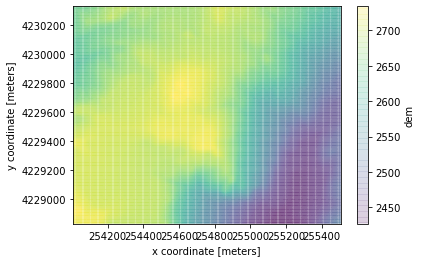

In [4]:
dem.isel(x=slice(0, 500), y=slice(0,500)).plot(alpha=0.1)

In [5]:
# multiple file open snowdepth
# combine with DEM??
# use snowdepth time series to interpolate years 2015 and 2017
# generate and plot contour map of DEM
# plot 2015 and 2017 data in separate subplots (and/or subtract to find anomaly difference), overlaying contour map 

<a list of 75 text.Text objects>

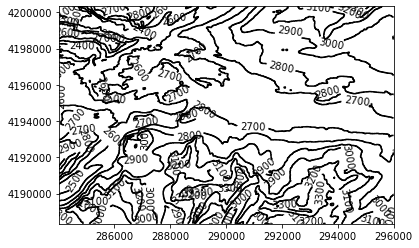

In [6]:
fig, ax = plt.subplots()
levels = np.arange(0, 4000, 100)

contours = ax.contour(dem.x.isel(x=slice(10000,14000)), dem.y.isel(y=slice(10000,14000)), dem.isel(x=slice(10000,14000), y=slice(10000,14000)), levels=levels, colors='k')

ax.clabel(contours, fmt='%1.0f')

In [7]:
print(dem.isel(x=slice(10000, 14000), y=slice(10000,14000)).values)

[[2080.201  2080.294  2080.294  ... 3052.2158 3052.2158 3052.2158]
 [2080.201  2080.294  2080.294  ... 3052.2158 3052.2158 3052.2158]
 [2080.201  2080.294  2080.294  ... 3052.2158 3052.2158 3052.2158]
 ...
 [2728.657  2731.0837 2731.0837 ... 3033.8645 3033.8645 3033.8645]
 [2728.657  2731.0837 2731.0837 ... 3033.8645 3033.8645 3033.8645]
 [2730.326  2732.6519 2732.6519 ... 3035.4636 3035.4636 3035.4636]]


In [8]:
#test=np.random.rand(7000,7000)
#test.shape
#plt.imshow(test)

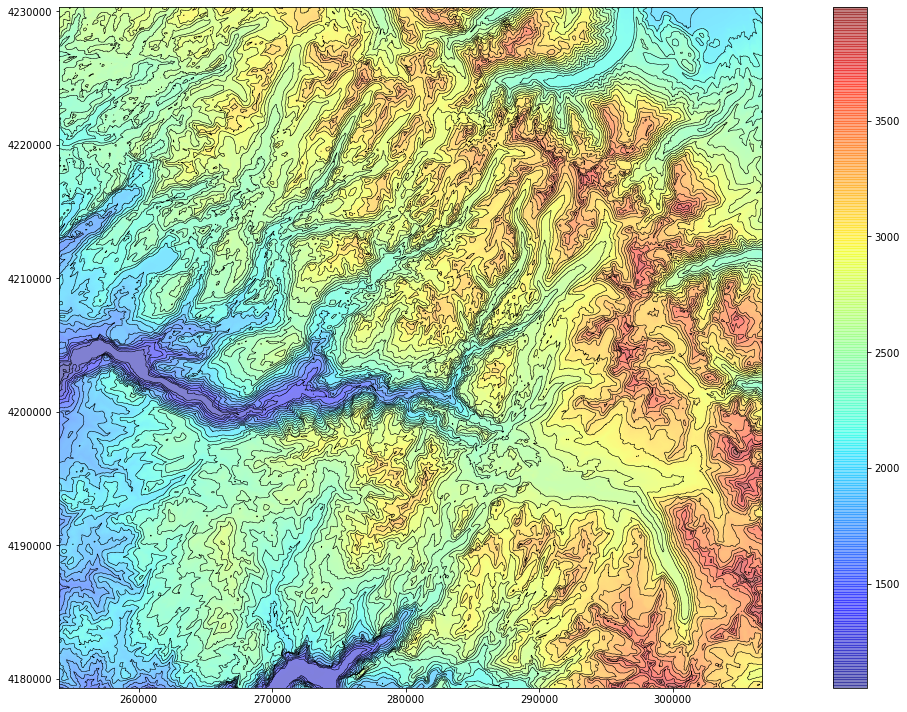

In [9]:
# superimposing two data layers
plt.figure(figsize=(20,10))

#x = dem.x.isel(x=slice(10000,17000))
#y = dem.y.isel(y=slice(10000,17000))
#z = dem.isel(x=slice(10000,17000), y=slice(10000,17000))

contours = plt.contour(dem.x, dem.y, dem, colors='k', levels=levels, linewidths=0.5)
plt.imshow(dem, extent=[np.min(dem.x), np.max(dem.x), np.min(dem.y), np.max(dem.y)], alpha=0.5, cmap='jet')

plt.colorbar()
plt.tight_layout()
plt.savefig('./figures/dem_contour_100.png')
#plt.clabel(contours, fmt='%1.0f')